# Weight Sharing Testing

## Setup

In [1]:
%cd ..

/Users/Niels/Documents/EPFL/Master/DeepLearning/project1


### Imports

In [2]:
import time

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

import models as models
from train import train
from evaluation import model_evaluation

### Helpers

In [3]:
def parse_round_results(round_results):
    
    train_loss = []
    train_error = []
    test_error = []
    
    
    for tr_loss, tr_err, _, te_err in round_results:
        train_loss.append(tr_loss)
        train_error.append(tr_err)
        test_error.append(te_err)
        
    train_loss = torch.tensor(train_loss)
    train_error = torch.tensor(train_error)
    test_error = torch.tensor(test_error)
    
    # Mean of the values per epoch
    mean_train_loss = train_loss.mean(dim=0)
    mean_train_error = train_error.mean(dim=0)
    mean_test_error = test_error.mean(dim=0)
    
    # Standard deviation of the values per epoch
    std_train_loss = train_loss.std(dim=0)
    std_train_error = train_error.std(dim=0)
    std_test_error = test_error.std(dim=0)
    
    print(f'Model Results:')
    print(f'    Mean Training Loss:  {mean_train_loss[-1]:.2f}')
    print(f'    Mean Training Error: {100 * mean_train_error[-1]:.2f}%')
    print(f'    Mean Testing Error:  {100 * mean_test_error[-1]:.2f}%')
    print()
    print(f'    Training Loss STD:   {std_train_loss[-1]:.4f}')
    print(f'    Training Error STD:  {100 * std_train_error[-1]:.2f}')
    print(f'    Testing Error STD:   {100 * std_test_error[-1]:.2f}')
    
    plt.figure(figsize=(15, 5))
    plt.title('Model Training Loss')
    plt.xlabel('EPOCH')
    plt.ylabel('LOSS')
    plt.grid()
    plt.plot(range(1, len(mean_train_loss) + 1), mean_train_loss)
    plt.show()
    
    plt.figure(figsize=(15, 5))
    plt.title('Model Error Rate')
    plt.xlabel('EPOCH')
    plt.ylabel('ERROR RATE (%)')
    plt.grid()
    plt.plot(range(1, len(mean_train_error) + 1), mean_train_error, label='Mean Training Error')
    plt.plot(range(1, len(mean_train_error) + 1), mean_test_error, label='Mean Test Error')
    plt.legend()
    plt.show()

## Model Testing

In [8]:
lr = 0.0001
batch_size = 50
hidden_layer_units = 200

In [9]:
def weight_sharing():
    """ Generates the first baseline """
    model = models.WeightSharingCNN(hidden_layer_units=hidden_layer_units)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    return model, criterion, optimizer
    
    
model, _, _ = weight_sharing()
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Model Parameters: {num_params}')

model

Model Parameters: 53904


WeightSharingCNN(
  (lenet): CustomLeNet5(
    (conv_layer_1): Sequential(
      (0): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (conv_layer_2): Sequential(
      (0): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (classifier): Sequential(
      (0): Linear(in_features=288, out_features=120, bias=True)
      (1): ReLU()
      (2): Linear(in_features=120, out_features=84, bias=True)
      (3): ReLU()
      (4): Linear(in_features=84, out_features=10, bias=True)
    )
  )
  (classifier): MLPClassifier(
    (fc1): Linear(in_features=20, out_features=200, bias=True)
    (relu): ReLU()
    (fc2): Linear(in_features=200, out_features=2, bias=True)
  )
)

In [10]:
rounds = 5
epochs = 25
seed = 0

round_results_baseline = model_evaluation(weight_sharing, train, rounds, epochs, batch_size, seed=seed)

Round 1
Test results:
  Train Loss:       0.045
  Train Error Rate:  0.10%
  Test Error Rate:   16.40%
-------------------------------------------------- 

Round 2
Test results:
  Train Loss:       0.047
  Train Error Rate:  0.30%
  Test Error Rate:   15.50%
-------------------------------------------------- 

Round 3
Test results:
  Train Loss:       0.048
  Train Error Rate:  0.50%
  Test Error Rate:   15.80%
-------------------------------------------------- 

Round 4
Test results:
  Train Loss:       0.060
  Train Error Rate:  1.00%
  Test Error Rate:   17.90%
-------------------------------------------------- 

Round 5
Test results:
  Train Loss:       0.069
  Train Error Rate:  1.30%
  Test Error Rate:   16.60%
-------------------------------------------------- 



Model Results:
    Mean Training Loss:  0.05
    Mean Training Error: 0.64%
    Mean Testing Error:  16.44%

    Training Loss STD:   0.0103
    Training Error STD:  0.50
    Testing Error STD:   0.93


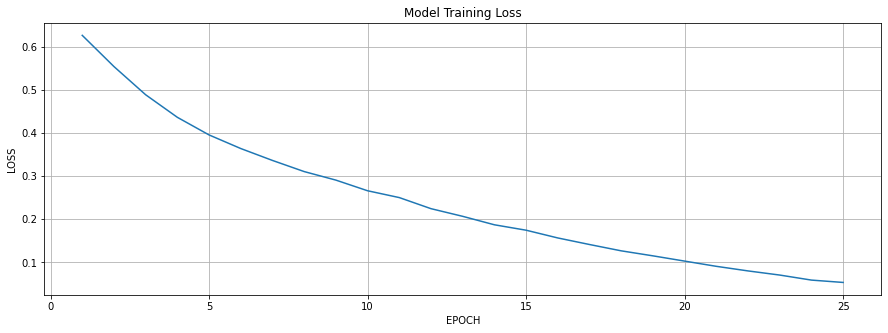

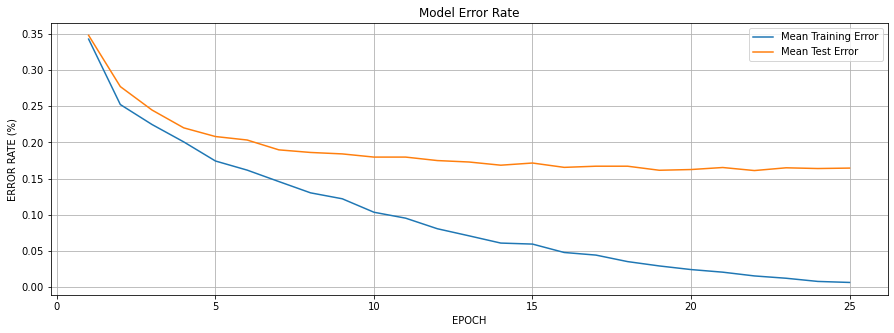

In [11]:
parse_round_results(round_results_baseline)